Name- Arindam Jain

E-mail- arindamjain18@gmail.com
******************** ********************************************
Task:
Clustering use case :
1.	Load any standard dataset.
2.	Apply k-means algorithm with some k (e.g., k=3) on all numeric features (Numeric feature selection logic should be generic irrespective of the dataset).
3.	Find intra-cluster distance for all the clusters (mean distance of data points from their centroid)
4.	Find cluster with lowest intra-cluster distance and print n closest data points to the centroid of this cluster.
 
Note :
1.	Handle most if not all error conditions (Boundary conditions), e.g., If I change k value, the process should not fail.
2.	The code should be clean.
3.	Coding standards should be followed.
******************** ********************************************

# Import Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.datasets import load_iris
%matplotlib inline

# Using standard iris Data

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['flower'] = iris.target

In [5]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'],axis='columns',inplace=True)


In [6]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Visualise data points

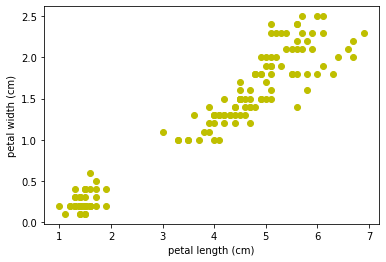

In [7]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"],c='y')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

# Select any K (default k=3)

In [8]:
K=3

In [9]:
km = KMeans(n_clusters=K)
clus = km.fit_predict(df)
clus

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
df['cluster'] = clus
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,2
1,1.4,0.2,2
2,1.3,0.2,2
3,1.5,0.2,2
4,1.4,0.2,2


In [11]:
df.cluster.unique()

array([2, 0, 1], dtype=int32)

# Select random observation as centroids

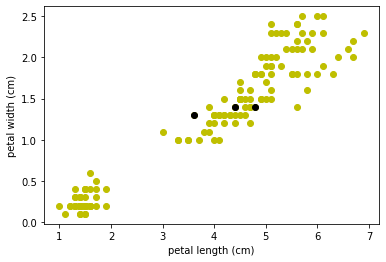

In [12]:
Centroids = (df.sample(n=K))
plt.scatter(df["petal length (cm)"],df["petal width (cm)"],c='y')
plt.scatter(Centroids["petal length (cm)"],Centroids["petal width (cm)"],c='black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

# Getting Centroids from scratch

In [13]:
diff = 1
j=0
while(diff!=0):
    XD=df
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["petal length (cm)"]-row_d["petal length (cm)"])**2
            d2=(row_c["petal width (cm)"]-row_d["petal width (cm)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1

    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    Centroids_new = df.groupby(["Cluster"]).mean()[["petal length (cm)","petal width (cm)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['petal length (cm)'] - Centroids['petal length (cm)']).sum() + (Centroids_new['petal width (cm)'] - Centroids['petal width (cm)']).sum()
        print(diff.sum())
    Centroids = df.groupby(["Cluster"]).mean()[["petal length (cm)","petal width (cm)"]]

-0.6121060787951557
-0.036234247545172044
0.0


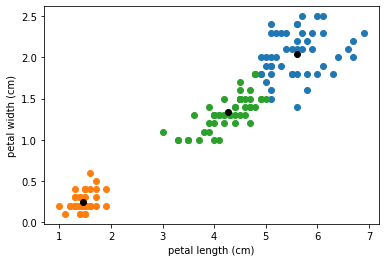

In [14]:
for k in range(K):
    data=df[df["Cluster"]==k+1]
    plt.scatter(data["petal length (cm)"],data["petal width (cm)"])
plt.scatter(Centroids["petal length (cm)"],Centroids["petal width (cm)"],c='black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()


# K Centroids

In [15]:
Centroids

,petal length (cm),petal width (cm)
Cluster,,
1,5.595833,2.037500
2,1.462000,0.246000
3,4.269231,1.342308


In [16]:
data2D=df[['petal length (cm)','petal width (cm)']]
data2D.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [17]:
km = KMeans(n_clusters=K)
alldistances = km.fit_transform(data2D)

# intra-cluster distance for all the clusters (mean distance of data points from their centroid)

In [18]:
a=1
arr=np.mean(alldistances, axis = 0)
for i in arr:
    print("Intra-cluster distance from centroid ",a," = ", i )
    a=a+1

Intra-cluster distance from centroid  1  =  1.6398557186631053
Intra-cluster distance from centroid  2  =  2.546111592966172
Intra-cluster distance from centroid  3  =  2.1897530015295836


# Finding lowest intra-cluster distance and centroid

In [19]:
minCentroid = np.argmin(arr)
print('Minimum Centroid distance cluster is : ', minCentroid+1)

Minimum Centroid distance cluster is :  1


# Cordinates of min intra-cluster distance centroid

In [20]:
Centroids[minCentroid:minCentroid+1]

,petal length (cm),petal width (cm)
Cluster,,
1,5.595833,2.0375


In [21]:
closest, _ = pairwise_distances_argmin_min(km.cluster_centers_, data2D)

In [22]:
closest

array([ 74,   3, 128])

# closest data points to the centroid with lowest intra-cluster distance

In [23]:
print(K," closest data points to the centroid of this cluster")
for i in closest:
    print("------------------------")
    print(data2D.iloc[i])

3  closest data points to the centroid of this cluster
------------------------
petal length (cm)    4.3
petal width (cm)     1.3
Name: 74, dtype: float64
------------------------
petal length (cm)    1.5
petal width (cm)     0.2
Name: 3, dtype: float64
------------------------
petal length (cm)    5.6
petal width (cm)     2.1
Name: 128, dtype: float64
